## Predicting Interceptions in the NFL


#### Installing Packages 

In [ ]:
!pip install nfl_data_py
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install sklearn
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.0-py3-none-any.whl size=25086 sha256=1ff7b9931bf87bacbb7bcdb95c7838bdde117e6b9a5b90071ad9d9ab0ad8d806
  Stored in directory: /root/.cache/pip/wheels/83/17/5a/750f2a5cec7b32c7df0a0130ae6abb97ffb44dee391c6d8d27
Successfully built nfl_data_py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, ht

#### Loading in Packages

In [ ]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from xgboost import XGBClassifier

#### Loading in Play-by-Play Data

In [ ]:
pbp = nfl.import_pbp_data([2020, 2021, 2022])

2020 done.
2021 done.
2022 done.
Downcasting floats.


In [ ]:
pbp.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0.0,0.0
1,39.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,None,None,NaN,None,NaN,45142;46331;46674;45037;46253;44878;42579;4637...,00-0033258;00-0034490;00-0033862;00-0029747;00...,00-0034073;00-0034730;00-0033783;00-0031961;00...,11.0,11.0
2,54.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,SHOTGUN,"2 RB, 1 TE, 2 WR",7.0,"2 DL, 5 LB, 4 DB",4.0,40078;46078;45069;46113;38551;45185;42718;4781...,00-0029892;00-0034847;00-0033221;00-0034860;00...,00-0029585;00-0035236;00-0031557;00-0035705;00...,11.0,11.0
3,93.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,SHOTGUN,"2 RB, 1 TE, 2 WR",7.0,"2 DL, 5 LB, 4 DB",NaN,40078;46078;45069;46113;38551;45185;42718;4781...,00-0029892;00-0034847;00-0033221;00-0034860;00...,00-0029585;00-0035236;00-0031557;00-0035705;00...,11.0,11.0
4,118.0,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,...,SINGLEBACK,"2 RB, 1 TE, 2 WR",7.0,"2 DL, 5 LB, 4 DB",NaN,40078;46078;46113;45069;38551;45185;42718;4781...,00-0029892;00-0034847;00-0034860;00-0033221;00...,00-0029585;00-0035236;00-0031557;00-0029747;00...,11.0,11.0


#### Getting Dataset Ready for Modeling

In [ ]:
print(pbp.shape)
pbp_clean = pbp[(pbp['pass'] == 1) & (pbp['play_type'] != "no_play")]
print(pbp_clean.shape)

(149373, 384)
(64411, 384)


#### Doing some EDA

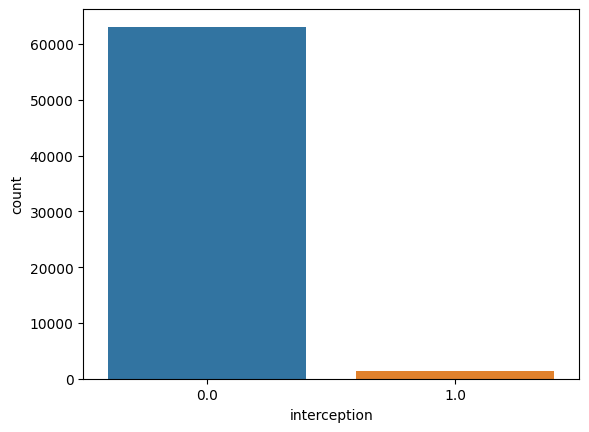

In [ ]:
sns.countplot(x=pbp_clean["interception"])
plt.show()

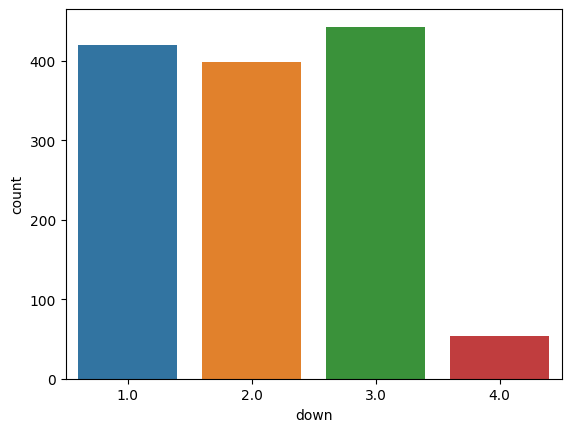

In [ ]:
interceptions = pbp_clean[(pbp_clean['interception'] == 1)]
sns.countplot(x=interceptions["down"])
plt.show()

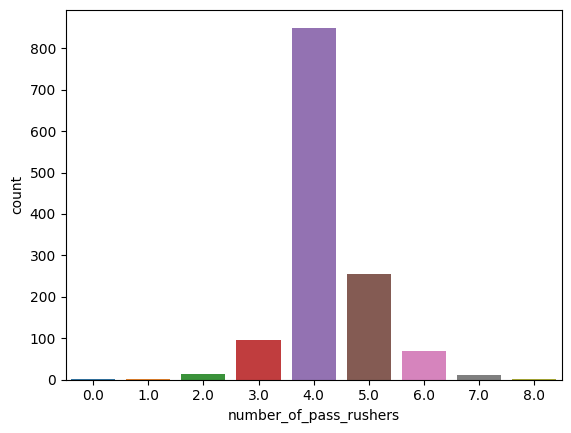

In [ ]:
interceptions = pbp_clean[(pbp_clean['interception'] == 1)]
sns.countplot(x=interceptions["number_of_pass_rushers"])
plt.show()

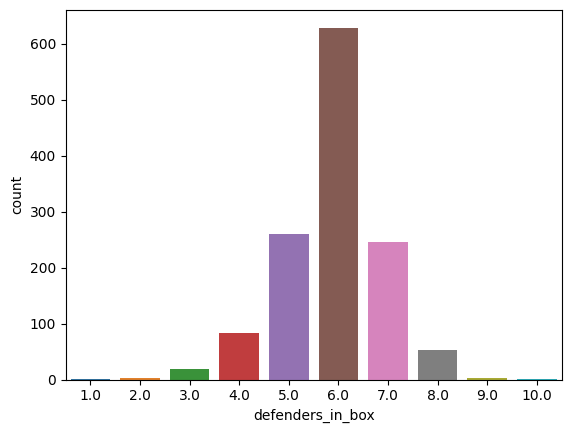

In [ ]:
interceptions = pbp_clean[(pbp_clean['interception'] == 1)]
sns.countplot(x=interceptions["defenders_in_box"])
plt.show()

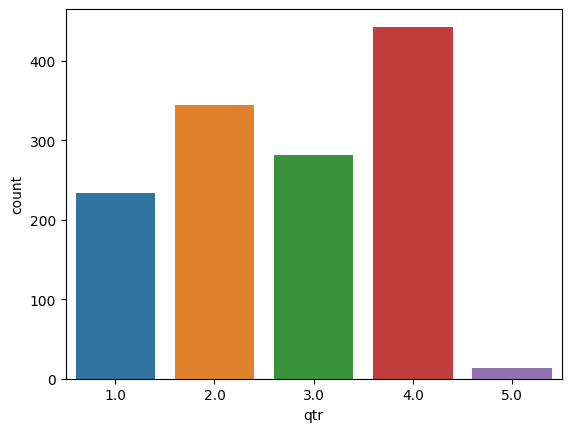

In [ ]:
interceptions = pbp_clean[(pbp_clean['interception'] == 1)]
sns.countplot(x=interceptions["qtr"])
plt.show()

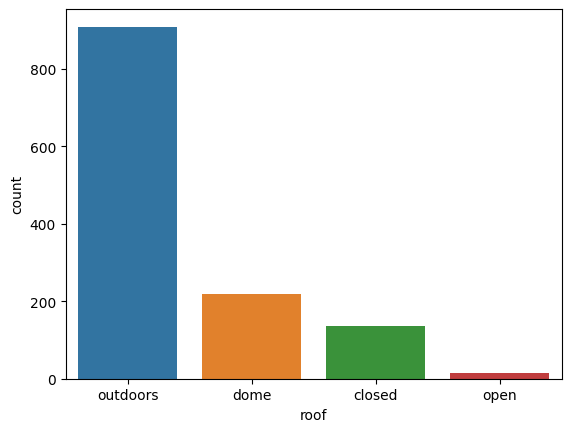

In [ ]:
interceptions = pbp_clean[(pbp_clean['interception'] == 1)]
sns.countplot(x=interceptions["roof"])
plt.show()

#### Feature Engineering

In [ ]:
pbp_clean['obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1,0)

<ipython-input-11-aefebe19c44f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp_clean['obvious_pass'] = np.where((pbp_clean['down'] == 3) & (pbp_clean['ydstogo'] >= 6), 1,0)


In [ ]:
pbp_clean.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'offense_personnel', 'defenders_in_box', 'defense_personnel',
       'number_of_pass_rushers', 'players_on_play', 'offense_players',
       'defense_players', 'n_offense', 'n_defense', 'obvious_pass'],
      dtype='object', length=385)

In [ ]:
pre_df = pbp_clean[['game_id', 'play_id', 'season', 'name', 'down', 'ydstogo', 'yardline_100', 'half_seconds_remaining',
                    'game_seconds_remaining', 'qtr', 'defenders_in_box', 'number_of_pass_rushers', 'xpass', 'obvious_pass', 'interception']]
df = pre_df.dropna()
df.isna().sum()

game_id                   0
play_id                   0
season                    0
name                      0
down                      0
ydstogo                   0
yardline_100              0
half_seconds_remaining    0
game_seconds_remaining    0
qtr                       0
defenders_in_box          0
number_of_pass_rushers    0
xpass                     0
obvious_pass              0
interception              0
dtype: int64

In [ ]:
df.head()

,game_id,play_id,season,name,down,ydstogo,yardline_100,half_seconds_remaining,game_seconds_remaining,qtr,defenders_in_box,number_of_pass_rushers,xpass,obvious_pass,interception
2,2020_01_ARI_SF,54.0,2020,J.Garoppolo,1.0,10.0,75.0,1800.0,3600.0,1.0,7.0,4.0,0.515058,0,0.0
6,2020_01_ARI_SF,165.0,2020,J.Garoppolo,3.0,14.0,45.0,1659.0,3459.0,1.0,5.0,4.0,0.971992,1,0.0
9,2020_01_ARI_SF,245.0,2020,K.Murray,1.0,10.0,75.0,1610.0,3410.0,1.0,5.0,4.0,0.442755,0,0.0
10,2020_01_ARI_SF,274.0,2020,K.Murray,2.0,7.0,72.0,1584.0,3384.0,1.0,7.0,4.0,0.597824,0,0.0
11,2020_01_ARI_SF,298.0,2020,K.Murray,1.0,10.0,65.0,1560.0,3360.0,1.0,6.0,4.0,0.453060,0,0.0


#### Modeling

In [ ]:
df['down'] = df['down'].astype('category')
df['qtr'] = df['qtr'].astype('category')
df_no_ids = df.drop(columns = ['game_id', 'play_id', 'name', 'season'])
df_no_ids = pd.get_dummies(df_no_ids, columns = ['down', 'qtr'])

<ipython-input-27-86d12a1d83f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['down'] = df['down'].astype('category')
<ipython-input-27-86d12a1d83f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qtr'] = df['qtr'].astype('category')


In [ ]:
df_no_ids.columns

Index(['ydstogo', 'yardline_100', 'half_seconds_remaining',
       'game_seconds_remaining', 'defenders_in_box', 'number_of_pass_rushers',
       'xpass', 'obvious_pass', 'interception', 'down_1.0', 'down_2.0',
       'down_3.0', 'down_4.0', 'qtr_1.0', 'qtr_2.0', 'qtr_3.0', 'qtr_4.0',
       'qtr_5.0'],
      dtype='object')

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in sss.split(df_no_ids, df_no_ids['interception']):
    strat_train_set = df_no_ids.iloc[train_index]
    strat_test_set = df_no_ids.iloc[test_index]

X_train = strat_train_set.drop(columns = ['interception'])
Y_train = strat_train_set['interception']
X_test = strat_test_set.drop(columns = ['interception'])
Y_test = strat_test_set['interception']

In [ ]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000)
LR.fit(X_train, Y_train)

LR_pred = pd.DataFrame(LR.predict_proba(X_test), columns = ['no_interception', 'interception'])[['interception']]

print('Brier Score: ', brier_score_loss(Y_test, LR_pred))

Brier Score:  0.021027772305927343


In [ ]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RF_pred = pd.DataFrame(RF.predict_proba(X_test), columns = ['no_interception', 'interception'])[['interception']]

print('Brier Score: ', brier_score_loss(Y_test, RF_pred))

Brier Score:  0.02232196663798239


In [ ]:
XGB = XGBClassifier(objective="binary:logistic", random_state=42)
XGB.fit(X_train, Y_train)

XGB_pred = pd.DataFrame(XGB.predict_proba(X_test), columns = ['no_interception', 'interception'])[['interception']]

print('Brier Score: ', brier_score_loss(Y_test, XGB_pred))

Brier Score:  0.021653921015965815


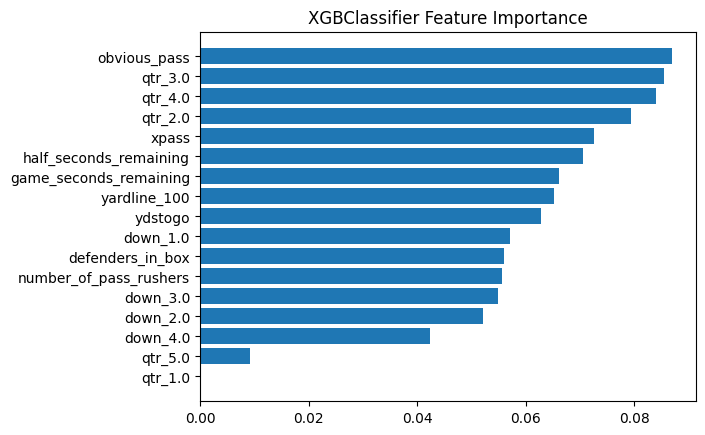

In [ ]:
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.title("XGBClassifier Feature Importance")
plt.show()

In [ ]:
make_ints_preds = df_no_ids.drop('interception', axis = 1)
XGB_total_predictions = pd.DataFrame(XGB.predict_proba(make_ints_preds), columns = ['no_interception', 'interception_pred'])[['interception_pred']]

ints_preds = df.reset_index().drop(columns = ['index'])
ints_preds['interception_pred'] = XGB_total_predictions

ints_preds['ints_oe'] = ints_preds['interception'] - ints_preds['interception_pred']
ints_preds[(ints_preds['season'] == 2022)].groupby('name').agg({'interception': 'sum', 'interception_pred': 'sum', 'ints_oe': 'sum'}).reset_index().sort_values('ints_oe', ascending = True)

,name,interception,interception_pred,ints_oe
94,T.Brady,10.0,17.389420,-7.389419
32,D.Jones,6.0,12.393584,-6.393584
52,J.Herbert,10.0,16.322243,-6.322243
51,J.Goff,7.0,12.110109,-5.110109
53,J.Hurts,6.0,10.744555,-4.744555
...,...,...,...,...
61,K.Allen,4.0,1.965986,2.034014
28,D.Carr,14.0,11.766667,2.233333
77,N.Foles,4.0,1.551899,2.448101
41,J.Allen,17.0,13.290319,3.709680


In [ ]:
ints_preds.groupby('name').agg({'interception': 'sum', 'interception_pred': 'sum', 'ints_oe': 'sum'}).reset_index().sort_values('ints_oe', ascending = True)

,name,interception,interception_pred,ints_oe
156,T.Brady,37.0,48.494904,-11.494905
6,A.Rodgers,22.0,33.468513,-11.468512
86,J.Herbert,35.0,43.897064,-8.897064
104,K.Cousins,34.0,41.641209,-7.641210
136,P.Mahomes,36.0,43.272606,-7.272607
...,...,...,...,...
127,M.White,12.0,7.271251,4.728749
155,T.Boyle,8.0,2.925473,5.074527
114,L.Jackson,31.0,25.719526,5.280473
138,P.Walker,11.0,5.657452,5.342548
